In [6]:
import numpy as np
import json 
import pandas as pd
import os

In [7]:
dirpath = os.getcwd()
feature_path = os.path.join(dirpath, "features_dict")
volume_path = os.path.join(feature_path, "volumes")
angle_path = os.path.join(feature_path, "angles")
distance_path = os.path.join(feature_path, "distance")
shape_path = os.path.join(feature_path, "shape")

filenames = [file.replace(".json", "") for file in os.listdir(volume_path)]

In [13]:
sides = ['front', 'back', 'right', 'left']
teats = ["lf", "rf", "lb", "rb"]
quarters = ["udder"] + teats
shapes = ['peri', 'area', 'circ', 'exc']
quarters_shapes =  [q +'_'+ s for q in quarters for s in shapes]

eudist_df = pd.DataFrame(columns = sides, index = filenames)
gddist_df = pd.DataFrame(columns = sides, index = filenames)
angles_df = pd.DataFrame(columns = teats, index = filenames)
area_df = pd.DataFrame(columns =["lfrb", "rflb"], index = filenames)
volume_df = pd.DataFrame(columns = quarters, index = filenames)
sarea_df = pd.DataFrame(columns =  quarters, index = filenames)
shape_df = pd.DataFrame(columns =  quarters_shapes, index = filenames)

for file in filenames: 
    with open(os.path.join(distance_path, file + ".json")) as f:
        distance_dict = json.load(f)
    with open(os.path.join(volume_path, file + ".json")) as f:
        volume_dict = json.load(f)
    with open(os.path.join(angle_path, file + ".json")) as f:
        angle_dict = json.load(f)
    with open(os.path.join(shape_path, file + ".json")) as f:
        shape_dict = json.load(f)
    
    volume_df.loc[file, "udder"] = volume_dict["udder"]["volume"]
    sarea_df.loc[file, "udder"] = volume_dict["udder"]["sarea"]*100*100
    for shape in shape_dict["udder"].keys():
        col  = 'udder' +'_'+ shape
        shape_df.loc[file, col] = shape_dict['udder'][shape]
    for teat in angle_dict.keys():
        angles_df.loc[file, teat] = angle_dict[teat]["angle"]
    for side in distance_dict.keys():
        eudist_df.loc[file, side] = distance_dict[side]["eu"]*100
        gddist_df.loc[file, side] = distance_dict[side]["geo"]*100
    for quarter in volume_dict['quarters'].keys():
        volume_df.loc[file, quarter] = volume_dict['quarters'][quarter]["volume"]
        sarea_df.loc[file, quarter] = volume_dict['quarters'][quarter]["sarea"] *100*100
    for quarter in shape_dict['quarters'].keys():
        qshape_dict = shape_dict['quarters'][quarter]
        for shape in qshape_dict.keys():
            col  = quarter+'_'+shape
            shape_df.loc[file, col] = qshape_dict[shape]
        
    area_df.loc[file, "lfrb"] = (angle_dict["lf"]["area"] + angle_dict["rb"]["area"]) *100*100
    area_df.loc[file, "rflb"] = (angle_dict["rf"]["area"] + angle_dict["lb"]["area"]) *100*100

volume_df.columns = [col +"_vol" for col in  volume_df.columns]
sarea_df.columns = [col +"_sarea" for col in  sarea_df.columns]
angles_df.columns = [col +"_angle" for col in  angles_df.columns]
eudist_df.columns = [col +"_eu" for col in  eudist_df.columns]
gddist_df.columns = [col +"_gd" for col in  gddist_df.columns]

merged_df = volume_df.join(sarea_df).join(angles_df).join(eudist_df).join(gddist_df).join(shape_df).reset_index().rename(columns={'index': 'filename'})
merged_df["cow"] = [file.split("_")[0] for file in merged_df.filename]

In [92]:
len(np.unique(merged_df.cow))

26

In [14]:
merged_df

,filename,udder_vol,lf_vol,rf_vol,lb_vol,rb_vol,udder_sarea,lf_sarea,rf_sarea,lb_sarea,...,rf_exc,lb_peri,lb_area,lb_circ,lb_exc,rb_peri,rb_area,rb_circ,rb_exc,cow
0,1003_20231117_163646_frame_10,10.085347,2.691554,4.362127,1.60228,1.326093,2107.096696,470.127507,726.034323,527.466256,...,0.563279,576.428499,18042.0,0.000022,0.630423,555.055916,14063.0,0.000035,0.740292,1003
1,1003_20231117_163646_frame_101,10.670358,2.844879,4.536889,1.950411,1.519086,2186.074938,437.43503,756.294818,626.029595,...,0.589756,619.984848,18830.0,0.000022,0.676141,573.754401,14723.0,0.000033,0.742839,1003
2,1003_20231117_163646_frame_102,10.166059,2.705153,4.343376,1.98235,1.207618,2128.27034,426.476972,760.900134,604.283126,...,0.584219,627.606168,18526.0,0.000023,0.668529,548.683333,14190.0,0.000034,0.733542,1003
3,1003_20231117_163646_frame_103,10.144001,2.750441,4.333266,1.872169,1.152562,2193.409579,429.919443,750.219094,637.631825,...,0.557171,607.706674,18755.0,0.000022,0.6558,556.263023,13852.0,0.000036,0.723152,1003
4,1003_20231117_163646_frame_104,10.442515,2.943085,4.448817,1.758072,1.237202,2096.918696,448.727387,758.697884,536.620097,...,0.577359,585.11479,17629.0,0.000024,0.613293,530.600072,13490.0,0.000037,0.682908,1003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,729_20231117_112927_frame_253,12.425154,5.250046,4.544747,0.834217,0.926158,2928.795763,1375.749199,976.69651,236.418491,...,0.784446,428.592929,10812.0,0.000046,0.617649,455.07821,11469.0,0.000043,0.584937,729
2940,729_20231117_112927_frame_254,11.881792,5.136259,4.242174,0.790775,0.854639,2935.392847,1381.999395,949.004772,228.731685,...,0.785556,434.113744,10175.0,0.000053,0.692654,493.599026,11558.0,0.000046,0.634148,729
2941,729_20231117_112927_frame_255,12.186122,5.35587,4.368945,0.761686,0.86722,2932.092769,1387.347666,999.217831,221.35932,...,0.783812,413.622366,10133.0,0.000051,0.693921,489.291414,11614.0,0.000046,0.610742,729
2942,729_20231117_112927_frame_256,11.811422,5.073356,4.206159,0.801609,0.808558,2911.028128,1313.530735,966.195029,234.279663,...,0.789406,430.83557,10182.0,0.000052,0.682847,475.320851,11365.0,0.000046,0.614367,729


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt 



<Axes: xlabel='cow', ylabel='udder_vol'>

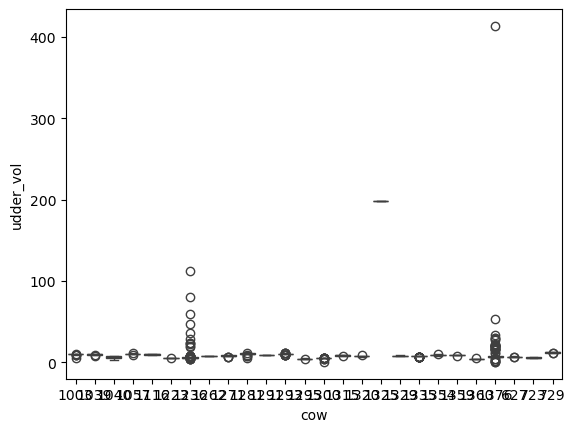

In [89]:

sns.boxplot(data=merged_df, y="udder_vol", x="cow")

In [90]:
m2 = merged_df[merged_df.udder_vol < 20]

<Axes: xlabel='cow', ylabel='udder_vol'>

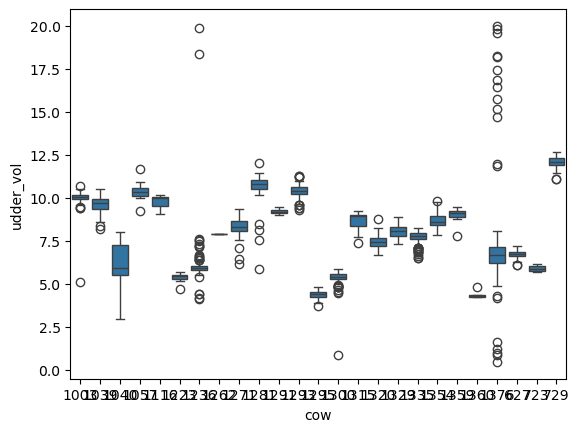

In [91]:
sns.boxplot(data=m2, y="udder_vol", x="cow")